## Notebook specifically for creating a $\Delta m$ vs. $\lambda$ plot to see the affect starspots of various size and temperature will have on various bandpass magnitudes we are interested in.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import HELP
get_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData
PleiadesDeltaV_VK = HELP.PleiadesDeltaV_VK
CMDData = HELP.CMDData
DeltaVfunc = HELP.DeltaVfunc

import getMag
getMag = getMag.getMag

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

[('U', 0.365, 5.7389142389326775), ('B', 0.445, 5.6829617273790056), ('V', 0.551, 4.9918828351727047), ('R', 0.658, 4.6646198217101), ('J', 1.235, 3.8701433579144764), ('H', 1.662, 3.5091529698031487), ('Ks', 2.159, 3.4575141423412465)]

[('U', 0.365, 7.4862728742029123), ('B', 0.445, 7.4299824004475798), ('V', 0.551, 6.7382966250240308), ('R', 0.658, 6.4067874379814), ('J', 1.235, 5.3726736840884737), ('H', 1.662, 4.9239326694612009), ('Ks', 2.159, 4.7894881284199151)]

[('U', 0.365, 6.7337393575802187), ('B', 0.445, 6.6776600926416361), ('V', 0.551, 5.9863535254741906), ('R', 0.658, 5.6574953231963097), ('J', 1.235, 4.7665747201136597), ('H', 1.662, 4.3670532479391442), ('Ks', 2.159, 4.2774461843919251)]

[('U', 0.365, 6.2935250099468885), ('B', 0.445, 6.2375161593403146), ('V', 0.551, 5.5463360666346029), ('R', 0.658, 5.2183636532997095), ('J', 1.235, 4.379918839740947), ('H', 1.662, 4.0007670543871985), ('Ks', 2.159, 3.9308985326768173)]



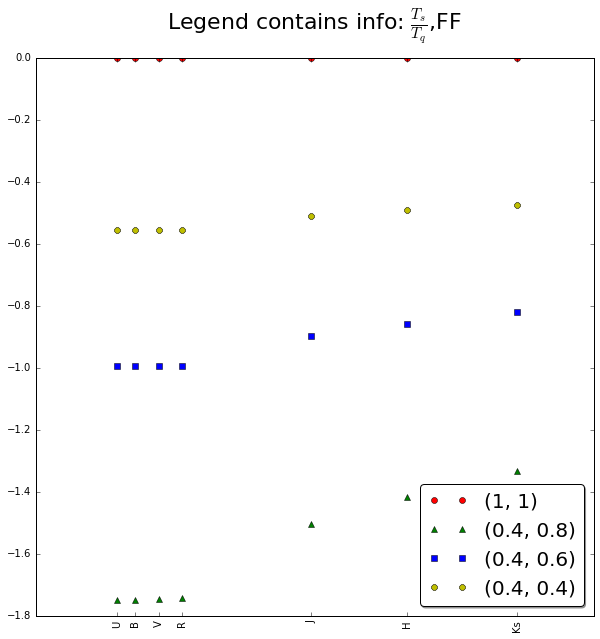

In [2]:
PhTemp = '5800'
SpTempRange = [1,0.4,0.4,0.4]
FillFactorRange = [1,0.8,0.6,0.4]
#initialize arrays of filter names
bands = np.array(['U','B','V','R','J','H','Ks'])

syn_phot_combined = []
for i in range(len(SpTempRange)):
    SpTemp = str(round(SpTempRange[i]*5800/100)*100)
    FillFactor = FillFactorRange[i]
    wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhTemp,SpTemp,FillFactor) #Creates spectrum for desired temps and fill-factor
    Flux = Dotter_rad( PhTemp, flux_Phoenix )

    #fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
    syn_phot = []
    for i in range(len(bands)):
        x = getMag_hires(bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
        syn_phot.append(x)
    Filters, Centers, Magnitudes = MagConvert(syn_phot)
    syn_phot_combined.append(syn_phot)
for i in range(len(syn_phot_combined)):
    print(syn_phot_combined[i])
    print()


plt.figure(figsize=(10,10))
PointType = ['ro','g^','bs','y8']
UnSpotMag = [i[2] for i in syn_phot_combined[0]] #Magnitudes of the unspotted star
idx=0
for i in range(len(syn_phot_combined)):
    Centers = [i[1] for i in syn_phot_combined[idx]]
    Magnitudes = [i[2] for i in syn_phot_combined[idx]]
    DeltaMag = []
    for i in range(len(UnSpotMag)):
        x = [UnSpotMag[i] - Magnitudes[i]]
        DeltaMag.append(x)
    plt.plot(Centers,DeltaMag,PointType[idx])
    idx=idx+1

plt.title(r'Legend contains info: $\frac{T_s}{T_q}$,FF',fontsize=22,y=1.04)

xlab = [i[0] for i in syn_phot_combined[0]]
plt.xticks(Centers,xlab,rotation='vertical')

legend = list(zip(SpTempRange,FillFactorRange))
plt.legend(legend,loc=4,fancybox=True,shadow=True,prop={'size':20})

plt.savefig('FirstRunDeltaMvLambda.jpg')

In [94]:
def DeltaMagPlot(PhTemp,SpTempRange,FillFactorRange,Count):
    '''
    Function to create plot data for Delta Magnitude vs. Band Magnitude where Delta Magnitude=0 for the first entry in SpTempRange
    and FillFactorRange lists. Goal is to establish and refine a set of spot temp and fill factor parameters to bound the Pleiades data
    Parameters
    ----------
    PhTemp: str
        Photospheric temperature of the star. Can be made into a list of photospheric temps in a loop to calculate the
        magnitudes for various star temperatures
    
    SpTempRange: list of floats
        Range of fractional spot temperatures to create curves for. Note sequential entries match with entries in FillFactorRange
        
    FillFactorRange: list of floats
        Range of filling factors to create curves for. Note sequential entries match with entries in SpTempRange
    
    Count: index to keep track of iterations through the function, used to assign each subplot its correct number
    
    Returns
    -------
    
    '''
    if type(FillFactorRange[0]) == list:
        Bands = np.array(['U','B','V','R','J','H','Ks'])
        Centers_combined=[]
        DeltaMag_Master=[]
        for fillFactor in FillFactorRange:
            syn_phot_combined=[]
            for i in range(len(SpTempRange)):
                SpTemp = str(round(SpTempRange[i]*5800/100)*100)
                FillFactor = fillFactor[i]
                wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhTemp,SpTemp,FillFactor) #Creates spectrum for desired temps and fill-factor
                Flux = Dotter_rad( PhTemp, flux_Phoenix )

                #fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
                syn_phot = []
                for i in range(len(Bands)):
                    x = getMag_hires(Bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
                    syn_phot.append(x)
                ABsyn_phot = MagConvert(syn_phot)
                syn_phot_combined.append(ABsyn_phot)
            PointType = ['ro','g^','bs','y8']
            UnSpotMag = syn_phot_combined[0][2] #Magnitudes of the unspotted star
        
            idx=0
            Centers=[]
            Magnitudes=[]
            DeltaMag_combined=[]
            for i in range(len(syn_phot_combined)):
                Centers = syn_phot_combined[idx][1]
                Magnitudes = syn_phot_combined[idx][2]
                DeltaMag = []
                for i in range(len(UnSpotMag)):
                    x = UnSpotMag[i] - Magnitudes[i]
                    DeltaMag.append(x)
                idx=idx+1
                DeltaMag_combined.append(DeltaMag)
            DeltaMag_Master.append(DeltaMag_combined)
        
    else:
        #initialize arrays of filter names
        Bands = np.array(['U','B','V','R','J','H','Ks'])
        Centers_combined=[]
        DeltaMag_Master=[]
        for sptemp in SpTempRange:
            syn_phot_combined=[]
            for i in range(len(FillFactorRange)):
                SpTemp = str(round(sptemp[i]*5800/100)*100)
                FillFactor = FillFactorRange[i]
                wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhTemp,SpTemp,FillFactor) #Creates spectrum for desired temps and fill-factor
                Flux = Dotter_rad( PhTemp, flux_Phoenix )

                #fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
                syn_phot = []
                for i in range(len(Bands)):
                    x = getMag_hires(Bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
                    syn_phot.append(x)
                ABsyn_phot = MagConvert(syn_phot)
                syn_phot_combined.append(ABsyn_phot)
            PointType = ['ro','g^','bs','y8']
            UnSpotMag = syn_phot_combined[0][2] #Magnitudes of the unspotted star
        
            idx=0
            Centers=[]
            Magnitudes=[]
            DeltaMag_combined=[]
            for i in range(len(syn_phot_combined)):
                Centers = syn_phot_combined[idx][1]
                Magnitudes = syn_phot_combined[idx][2]
                DeltaMag = []
                for i in range(len(UnSpotMag)):
                    x = UnSpotMag[i] - Magnitudes[i]
                    DeltaMag.append(x)
                idx=idx+1
                DeltaMag_combined.append(DeltaMag)
            DeltaMag_Master.append(DeltaMag_combined)
    return Bands,Centers,DeltaMag_Master

In [91]:
PhTemp = '5800'
SpTempRange = [1.,0.8,0.6,0.4]

Count=1
idx=9
FillFactorRange = []
while idx>=2:
    FillFactorRange.append([1.,idx/10,idx/10,idx/10])
    idx=idx-1
    Count=Count+1

Bands,Centers,DeltaMag_Master = DeltaMagPlot(PhTemp,SpTempRange,FillFactorRange,Count)

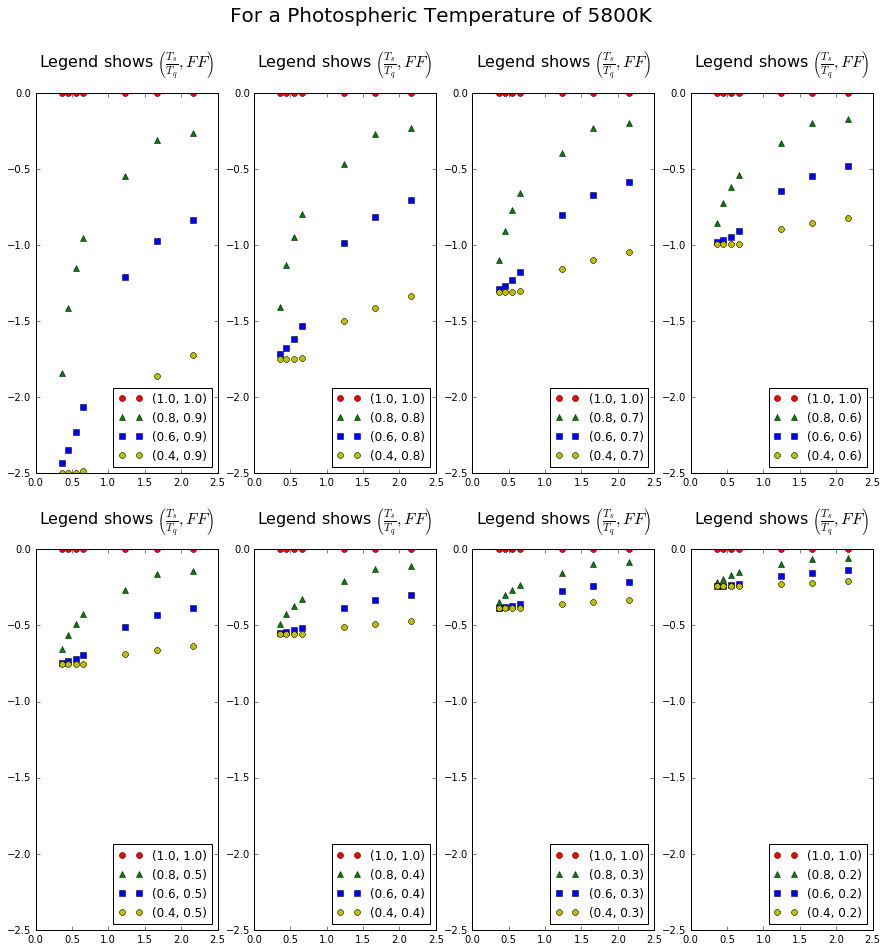

In [92]:
PointType = ['ro','g^','bs','y8']
fig = plt.figure(figsize=(15,15))
plt.suptitle('For a Photospheric Temperature of 5800K',fontsize=20)

idx=1
for j in DeltaMag_Master:
    
    ax = plt.subplot(2,4,idx)
    ax.set_title(r'Legend shows $\left(\frac{T_s}{T_q},FF\right)$',fontsize=16,y=1.05)
    ax.set_ylim([-2.5,0])
    
    k=0
    for i in j:
        ax.plot(Centers,i,PointType[k])
        k=k+1
    
    Legend=[]
    Legend=list(zip(SpTempRange,FillFactorRange[idx-1]))
    ax.legend(Legend,loc=4)
    idx=idx+1

plt.savefig('DMvWLtrend_FF.jpg')

In [95]:
PhTemp = '5800'
FillFactorRange = [1.,0.8,0.6,0.4]

Count=1
idx=9
SpTempRange = []
while idx>=4:
    SpTempRange.append([1.,idx/10,idx/10,idx/10])
    idx=idx-1
    Count=Count+1

Bands,Centers,DeltaMag_Master = DeltaMagPlot(PhTemp,SpTempRange,FillFactorRange,Count)

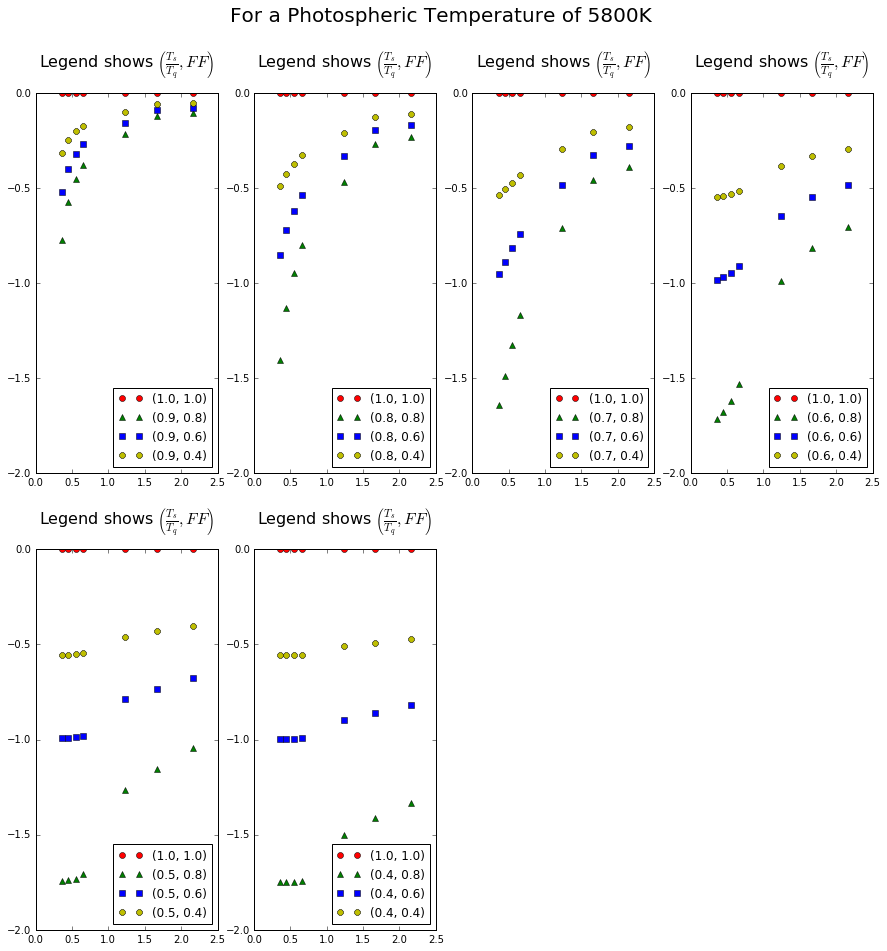

In [98]:
PointType = ['ro','g^','bs','y8']
fig = plt.figure(figsize=(15,15))
plt.suptitle('For a Photospheric Temperature of 5800K',fontsize=20)

idx=1
for j in DeltaMag_Master:
    
    ax = plt.subplot(2,4,idx)
    ax.set_title(r'Legend shows $\left(\frac{T_s}{T_q},FF\right)$',fontsize=16,y=1.05)
    ax.set_ylim([-2,0])
    
    k=0
    for i in j:
        ax.plot(Centers,i,PointType[k])
        k=k+1
    
    Legend=[]
    Legend=list(zip(SpTempRange[idx-1],FillFactorRange))
    ax.legend(Legend,loc=4)
    idx=idx+1

plt.savefig('DMvWLtrend_SpTemp.jpg')